Evaluate analytical method for producing average spectra.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Set up notebook and load some R68 constants (V, eps, etc.)
exec(open("nb_setup.py").read())#Is there a better way to do this?
from constants import *

../mplstyles
3.1.1
/data/chocula/mast/cdms/analysis/run068/R68_paper2019/mplstyles


In [3]:
#Load the data
import R68_load as r68

meas=r68.load_measured()
g4=r68.load_G4()
cap=r68.load_simcap()

Loading Measured Data...
(480634,)
(174510,)
Loading Geant4 Data...
(528848, 7)
(129555, 7)
Loading NRs...
1.5  min
Loading ERs...
0.4  min
Loading (n,gamma) Data...
200000


In [4]:
#Import yield models
import R68_yield as Yield

dict_keys(['xx', 'yy', 'ex', 'ey'])


/home/mast/python/miniconda3/envs/nr_fano/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/mast/python/miniconda3/envs/nr_fano/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
import R68_spec_tools as spec

In [6]:
Emax = 2000 #eVee
Ebins=np.linspace(0,Emax,201)
Ebin_ctr=(Ebins[:-1]+Ebins[1:])/2

In [7]:
Y=Yield.Yield('Lind',[0.15])

In [8]:
NRav,ERav,NGav=spec.buildAvgSimSpectra_ee(Ebins=Ebins, Evec_nr=g4['NR']['E'], Evec_er=g4['ER']['E'], Evec_ng=cap['E'], dEvec_ng=cap['dE'], Yield=Y, F_NR=2, scale_g4=1, scale_ng=1, doDetRes=True)

In [9]:
NR=list()
ER=list()
NG=list()

nspec=100
for i in np.arange(nspec):
    NRi,ERi,NGi=spec.buildSimSpectra_ee(Ebins=Ebins, Evec_nr=g4['NR']['E'], Evec_er=g4['ER']['E'], Evec_ng=cap['E'], dEvec_ng=cap['dE'], Yield=Y, F_NR=2, scale_g4=1, scale_ng=1, doDetRes=True, seed=i)

    NR.append(NRi)
    ER.append(ERi)
    NG.append(NGi)

NR=np.array(NR)
ER=np.array(ER)
NG=np.array(NG)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


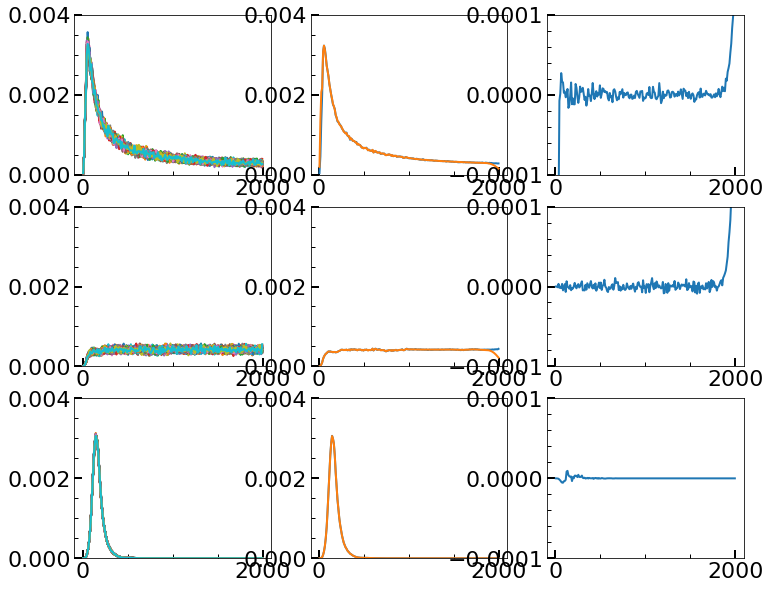

In [10]:
fig, ax = plt.subplots(3,3,figsize=(12.0,10.0),sharex=False)

#Overlay spectra instances
for i in np.arange(nspec):
    ax[0,0].plot(Ebin_ctr,NR[i]/g4['NR']['tlive'])
    ax[1,0].plot(Ebin_ctr,ER[i]/g4['ER']['tlive'])
    ax[2,0].plot(Ebin_ctr,NG[i]/cap['tlive'])

#Comapare average of instances to analytical average
ax[0,1].plot(Ebin_ctr,np.mean(NR,0)/g4['NR']['tlive'])
ax[0,1].plot(Ebin_ctr,NRav/g4['NR']['tlive'])

ax[1,1].plot(Ebin_ctr,np.mean(ER,0)/g4['ER']['tlive'])
ax[1,1].plot(Ebin_ctr,ERav/g4['ER']['tlive'])

ax[2,1].plot(Ebin_ctr,np.mean(NG,0)/cap['tlive'])
ax[2,1].plot(Ebin_ctr,NGav/cap['tlive'])

#Residuals
ax[0,2].plot(Ebin_ctr,(np.mean(NR,0)-NRav)/g4['NR']['tlive'])
ax[1,2].plot(Ebin_ctr,(np.mean(ER,0)-ERav)/g4['ER']['tlive'])
ax[2,2].plot(Ebin_ctr,(np.mean(NG,0)-NGav)/cap['tlive'])

for i in np.arange(3):
    for j in np.arange(2):
        ax[i,j].set_ylim(0,4e-3)
    ax[i,2].set_ylim(-1e-4,1e-4)


In [11]:
#Let's also make a plot showing the effects of applying the detector resolution function
NRraw,ERraw,NGraw=spec.buildAvgSimSpectra_ee(Ebins=Ebins, Evec_nr=g4['NR']['E'], Evec_er=g4['ER']['E'], Evec_ng=cap['E'], dEvec_ng=cap['dE'], Yield=Y, F_NR=2, scale_g4=1, scale_ng=1, doDetRes=False)

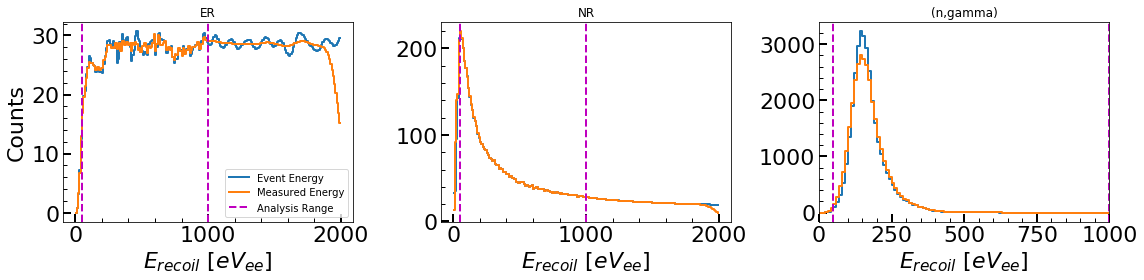

In [43]:
fig, ax = plt.subplots(1,3,figsize=(16.0,4.0),sharex=False)

ax[0].step(Ebin_ctr,ERraw,where='mid', label='Event Energy')
ax[0].step(Ebin_ctr,ERav,where='mid', label='Measured Energy')
ax[0].set_title('ER')
ax[0].set_xlabel(r'$E_{recoil}~[eV_{ee}]$')
ax[0].set_ylabel('Counts')

ax[1].step(Ebin_ctr,NRraw,where='mid')
ax[1].step(Ebin_ctr,NRav,where='mid')
ax[1].set_title('NR')
ax[1].set_xlabel(r'$E_{recoil}~[eV_{ee}]$')

ax[2].step(Ebin_ctr,NGraw,where='mid')
ax[2].step(Ebin_ctr,NGav,where='mid')
ax[2].set_xlim(0,1e3)
#ax[2].set_yscale('log')
#ax[2].set_ylim(1e-3,1e4)
ax[2].set_title('(n,gamma)')
ax[2].set_xlabel(r'$E_{recoil}~[eV_{ee}]$')

for axi in ax:
    axi.axvline(50, color='m', linestyle='--', linewidth=2, label='Analysis Range')
    axi.axvline(1000, color='m', linestyle='--', linewidth=2)
    
ax[0].legend()

plt.tight_layout()
plt.savefig('figures/det_res_effect.png')

In [44]:
print(np.sum(ERav[:100])/np.sum(ERraw[:100]))
print(np.sum(NRav)/np.sum(NRraw))
print(np.sum(NGav[:100])/np.sum(NGraw[:100]))

0.9993458867523537
1.0049920415112399
0.9971253356219308


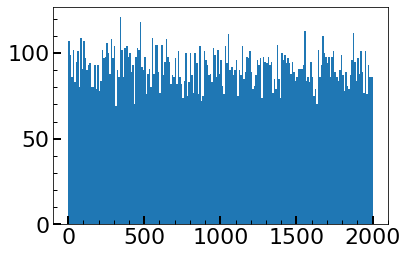

In [73]:
##It kinda looks like the ER suddenly gets way smoother at 1 keV. Is that real or a bug in the smearing effects?

Eee_er = np.sum(g4['ER']['E'],1)
plt.hist(Eee_er,bins=np.linspace(0,Emax,201));

In [74]:
SigmaEee_er = np.sqrt(Eee_er*(V**2)*F/eps/(G_NTL**2))
SigmaEee_er = 10*np.ones_like(Eee_er)

#Reshape so we can broadcast against bin centers
Eee_er = Eee_er[:,np.newaxis]
SigmaEee_er = SigmaEee_er[:,np.newaxis]
#Weighted spectra of Eee energies
nvec_Eee_er = spec.gausInt(Eee_er, SigmaEee_er, Ebins[:-1], Ebins[1:])
#ER spectrum
n_Eee_er = np.sum(nvec_Eee_er,0)

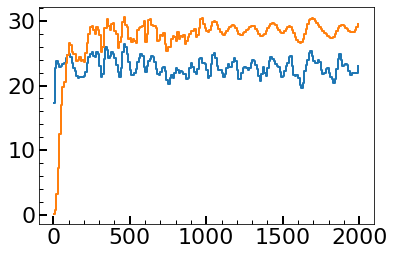

In [76]:
plt.step(Ebin_ctr,n_Eee_er/4,where='mid')
plt.step(Ebin_ctr,ERraw,where='mid')
#Huh, seems to be real

In [78]:
%prun spec.gausInt(Eee_er, SigmaEee_er, Ebins[:-1], Ebins[1:])

In [ ]:
def gausInt(mu, sigma, xlow, xhi):
    return np.where(sigma>0, 0.5*erf((mu-xlow)/np.sqrt(2)/sigma) - 0.5*erf((mu-xhi)/np.sqrt(2)/sigma), 1.0*((mu>xlow) & (mu<xhi)))
